# YOLO - You Only Look Once

## How does Yolo work?

YOLO divides the image into grids (squares). For each grid it predicts the probability of any given class, for example 20 classes. If the probability is not above some threshold, nothing is predicted as true

Once it DID predict something as true, if the object is not in the grid's center, it won't predict anything, although there IS something there. Once it DOES find an object that its center is in the grid, it predicts the following things:

1. The center offset, relative to the cell
2. The bounding box size (width and height) of the object
3. The class

YOLO uses a skip connection layer, which basically means moving a layer's output straight to another layer input. For example if I have 5 layers, I'll take the output of layer 3 and put it straight into layer 5 without passing through layer 4

A special kind of skip connection is the residual connection layer, which basically means adding the non processed input to the processed input, and together they make an output.

For example I have 5 layers. Layer 2 gets input, does something and outputs it. In a skip connection layer, the 3rd layer will get both the processed input and (summed) the raw input to layer 2.

It helps especially with vanishing gradients

## Implementation

YOLO <a href='https://arxiv.org/pdf/1506.02640'>paper</a> by Uni of Washington & Facebook 

In [22]:
bike_img = 'dirtbike.jpg'
piano_img = 'piano.jpg'

In [23]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [24]:
model = YOLO('yolov8n.pt')

In [26]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [12]:
image = cv2.imread(bike_img)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

In [13]:
# Perform object detection
%time results = model(image)


0: 384x640 1 person, 1 motorcycle, 84.3ms
Speed: 1.8ms preprocess, 84.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
CPU times: user 275 ms, sys: 276 ms, total: 551 ms
Wall time: 119 ms


In [14]:
# Access the first result (since results is a list)
result = results[0]

# Visualize predictions (bounding boxes, labels)
annotated_image = result.plot()  # `plot()` returns an annotated image

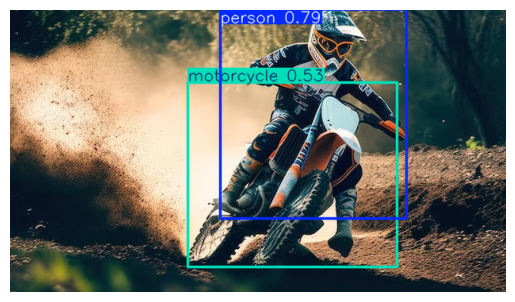

In [15]:
# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [16]:
# Optional: Print detection details
for box, cls, conf in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
    print(f"Class: {model.names[int(cls)]}, Confidence: {conf:.2f}, Box: {box.tolist()}")

Class: person, Confidence: 0.79, Box: [265.05426025390625, 0.19133852422237396, 500.67657470703125, 263.67822265625]
Class: motorcycle, Confidence: 0.53, Box: [224.17172241210938, 92.93250274658203, 488.1398010253906, 324.4303283691406]


In [30]:
def plot_boxed_img(img_path: str):
    image = cv2.imread(img_path)
    results = model(image)[0]
    annotated_image = results.plot()  
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


0: 512x640 2 persons, 83.0ms
Speed: 2.9ms preprocess, 83.0ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


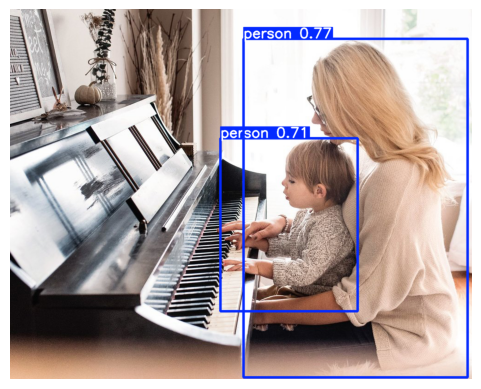

In [31]:
plot_boxed_img(piano_img)